<a href="https://colab.research.google.com/github/mmarin11/Colabfiles/blob/main/Practica25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de datos

In [14]:
"""
Ejercicio de Decision Tree - Clasificación de Precios de Vivienda
Dataset: Boston Housing
Objetivo: Predecir categorías de precio de vivienda
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("EJERCICIO: DECISION TREE PARA CLASIFICACIÓN DE PRECIOS DE VIVIENDA")
print("="*70)

# ============================================================================
# CARGA DE DATOS
# ============================================================================
print(" CARGA DE DATOS")
print("-" * 70)

# Nombres de las columnas
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Ruta del archivo subido por el usuario
file_path = "/content/drive/MyDrive/ClassFiles/housing.csv"

# Cargar datos
try:
    df = pd.read_csv(file_path, names=column_names, header=None)
    print(f"✓ Datos cargados exitosamente desde archivo local")
    print(f"✓ Dimensiones del dataset: {df.shape}")
    print(f"✓ Registros: {df.shape[0]}, Características: {df.shape[1]}")
except Exception as e:
    print(f"✗ Error al cargar datos: {e}")
    exit()

print("\nPrimeras 5 filas del dataset:")
print(df.head())

print("\nDescripción de las columnas:")
print("""
- CRIM: Tasa de criminalidad per cápita por ciudad
- ZN: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados
- INDUS: Proporción de acres de negocios no minoristas por ciudad
- CHAS: Variable ficticia del río Charles (1 si limita con el río; 0 en caso contrario)
- NOX: Concentración de óxidos nítricos (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de unidades ocupadas por propietarios construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- RAD: Índice de accesibilidad a carreteras radiales
- TAX: Tasa de impuesto a la propiedad por $10,000
- PTRATIO: Relación alumno-maestro por ciudad
- B: 1000(Bk - 0.63)^2 donde Bk es la proporción de afroamericanos por ciudad
- LSTAT: Porcentaje de población de estatus bajo
- MEDV: Valor medio de las viviendas ocupadas por propietarios en $1000s (TARGET)
""")

EJERCICIO: DECISION TREE PARA CLASIFICACIÓN DE PRECIOS DE VIVIENDA
 CARGA DE DATOS
----------------------------------------------------------------------
✓ Datos cargados exitosamente desde archivo local
✓ Dimensiones del dataset: (506, 14)
✓ Registros: 506, Características: 14

Primeras 5 filas del dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Descripción de las columnas:

- CRIM: Tasa de 

#Analiis descriptivo

ANÁLISIS EXPLORATORIO DE DATOS
----------------------------------------------------------------------

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CRIM            506 non-null    float64
 1   ZN              506 non-null    float64
 2   INDUS           506 non-null    float64
 3   CHAS            506 non-null    int64  
 4   NOX             506 non-null    float64
 5   RM              506 non-null    float64
 6   AGE             506 non-null    float64
 7   DIS             506 non-null    float64
 8   RAD             506 non-null    int64  
 9   TAX             506 non-null    float64
 10  PTRATIO         506 non-null    float64
 11  B               506 non-null    float64
 12  LSTAT           506 non-null    float64
 13  MEDV            506 non-null    float64
 14  PRICE_CATEGORY  506 non-null    int64  
dt

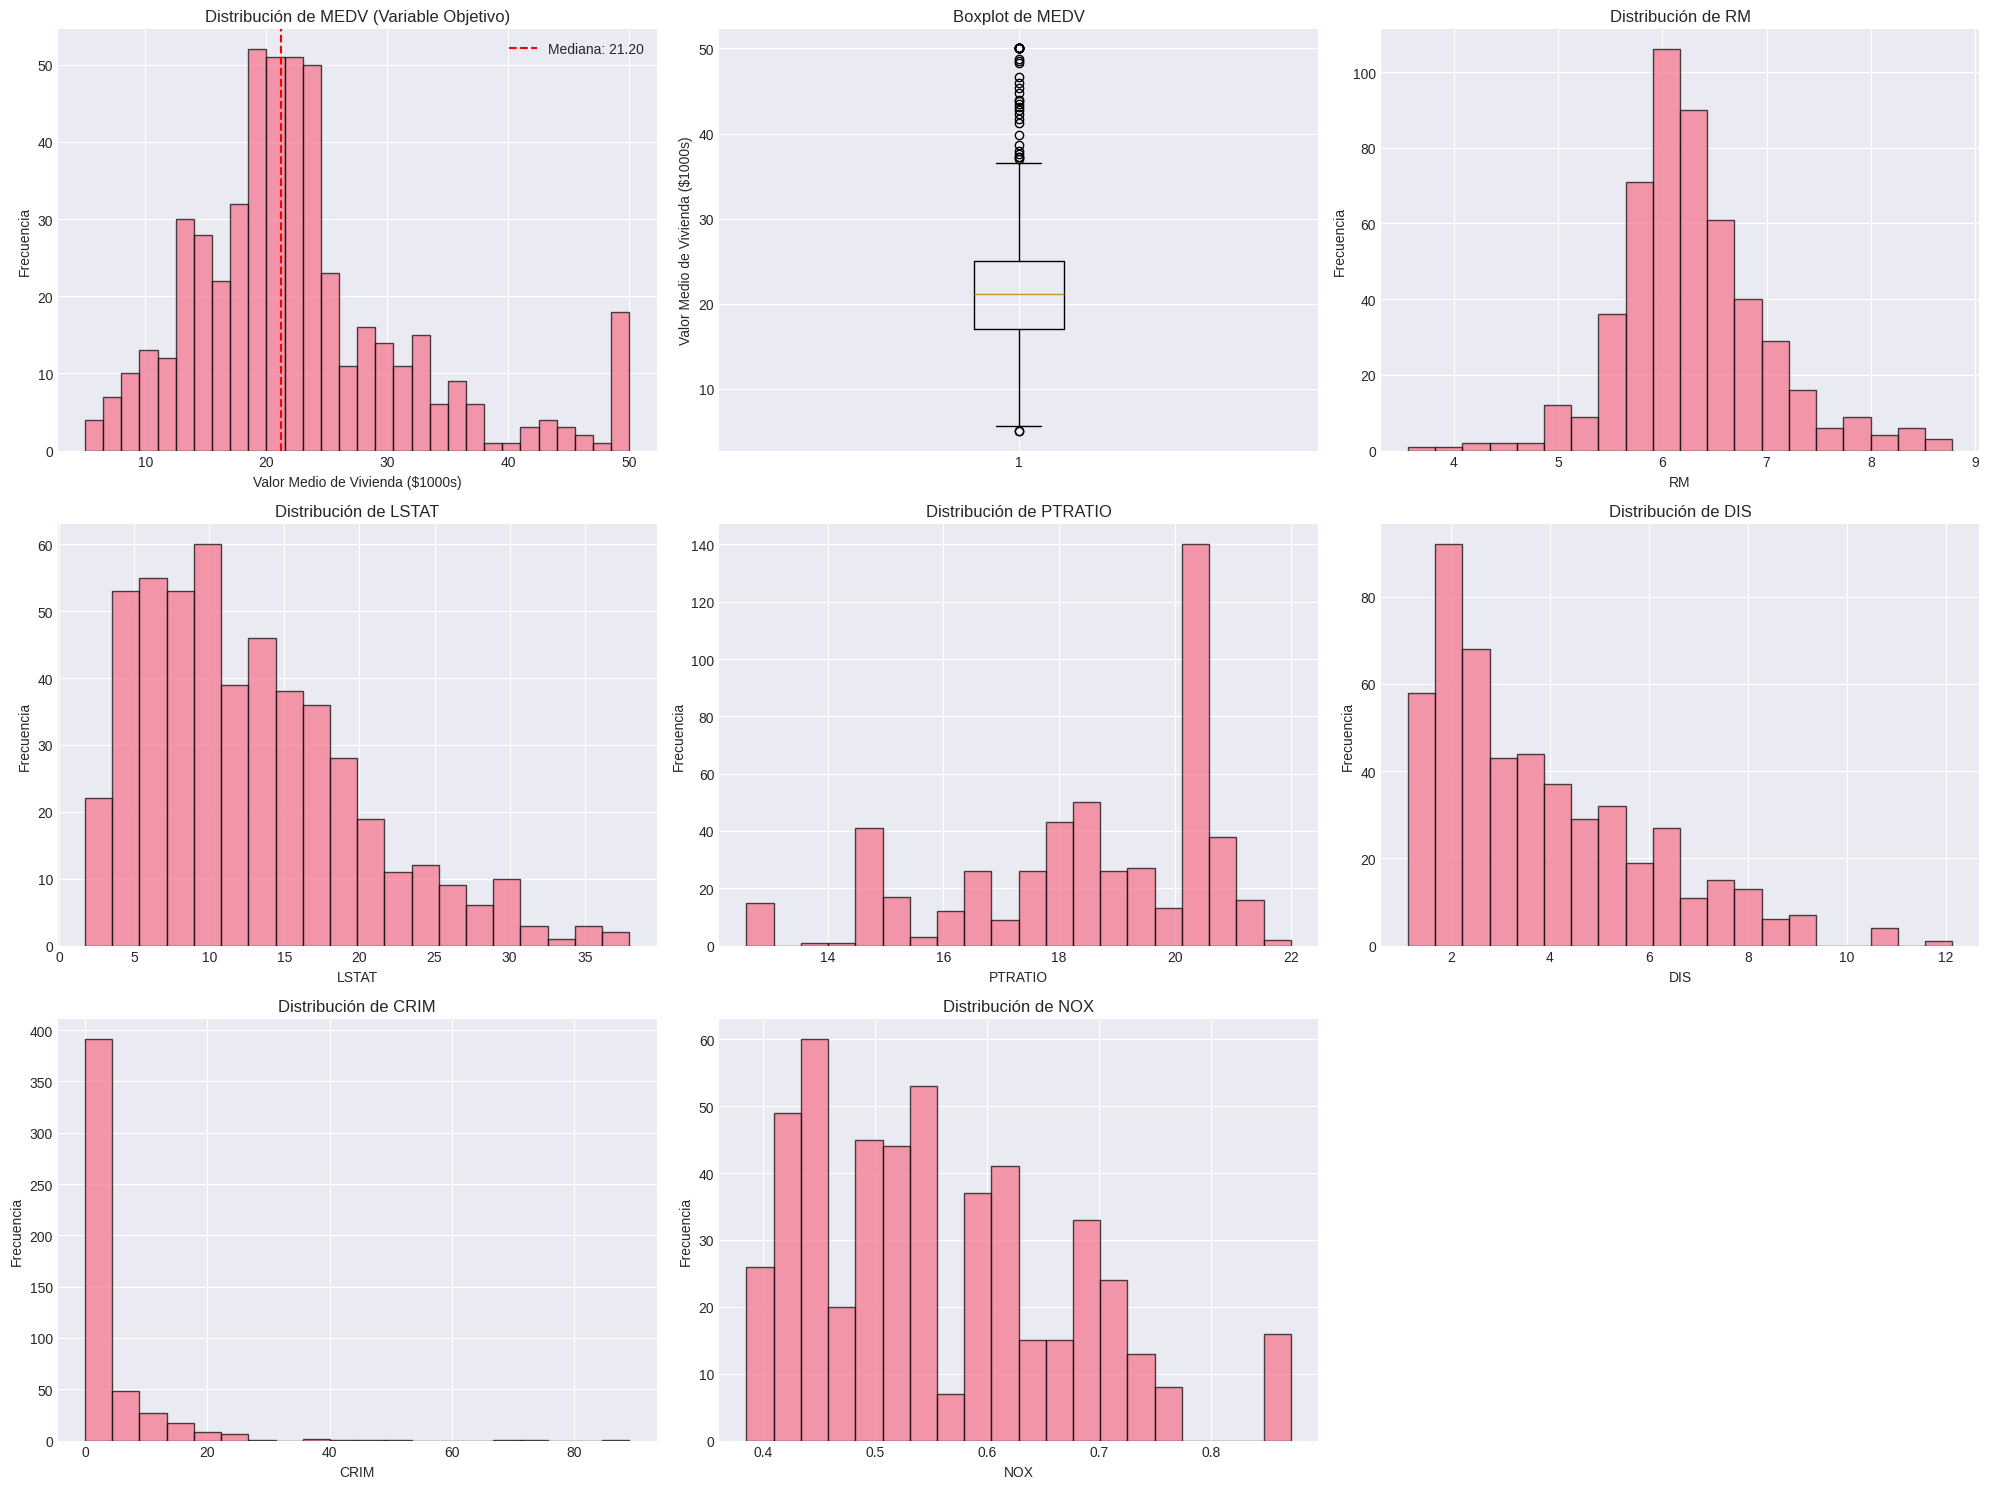

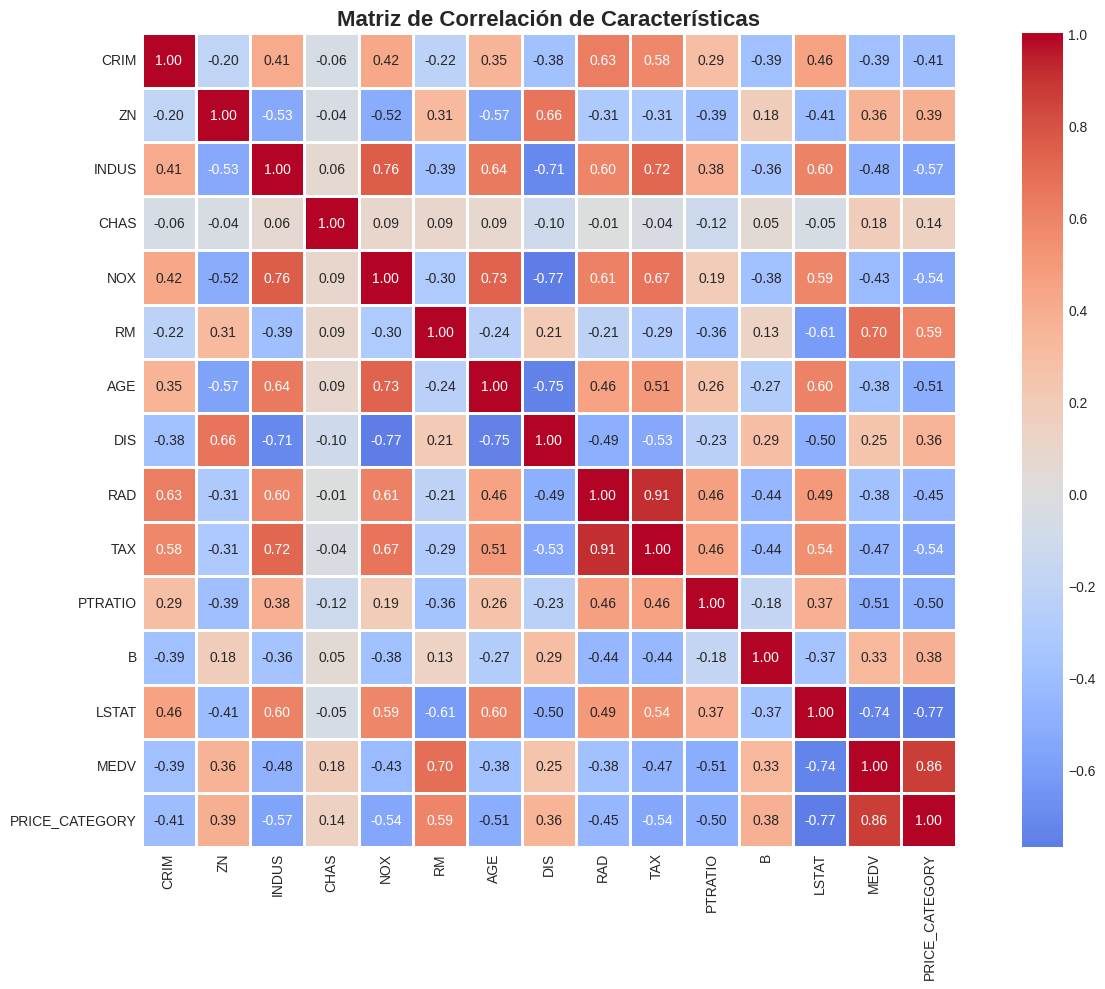

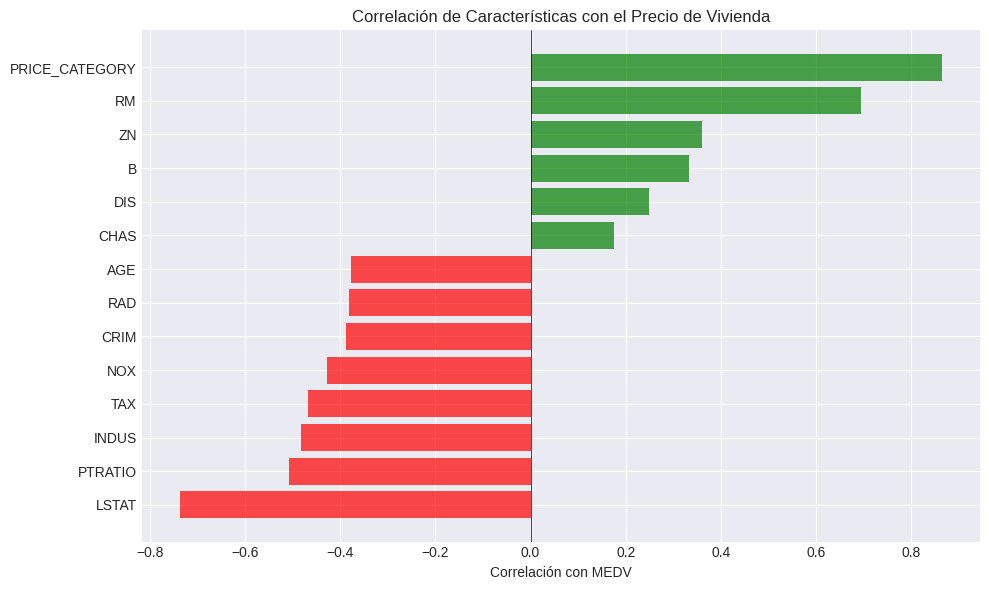

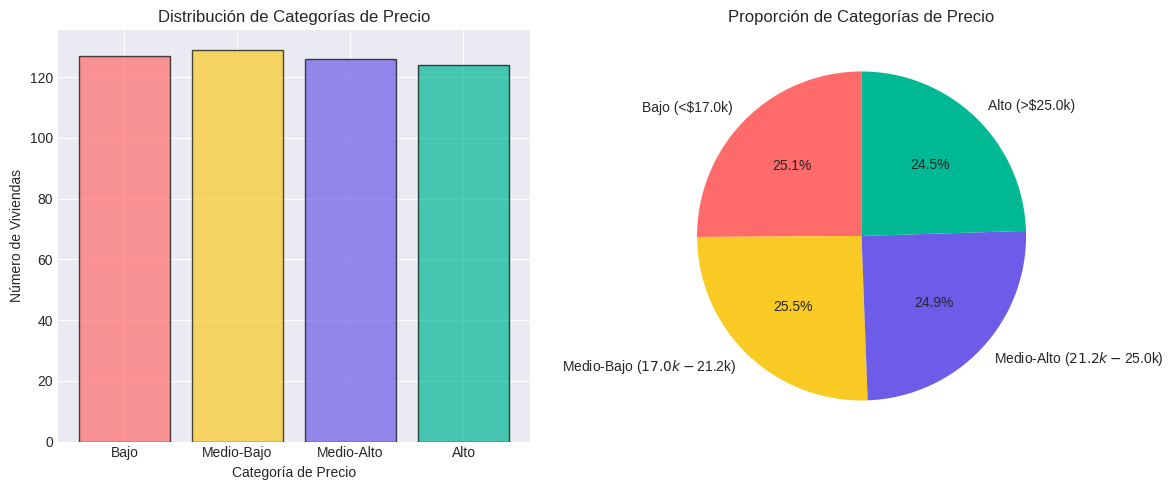

In [16]:
# ============================================================================
# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# ============================================================================
print("ANÁLISIS EXPLORATORIO DE DATOS")
print("-" * 70)

# Información del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())
if df.isnull().sum().sum() == 0:
    print("✓ No hay valores nulos en el dataset")
else:
    print("⚠ Se encontraron valores nulos")

# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nRegistros duplicados: {duplicados}")

# Crear figura para visualizaciones
fig = plt.figure(figsize=(20, 15))

# 2.1 Distribución de la variable objetivo (MEDV)
plt.subplot(3, 3, 1)
plt.hist(df['MEDV'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Valor Medio de Vivienda ($1000s)')
plt.ylabel('Frecuencia')
plt.title('Distribución de MEDV (Variable Objetivo)')
plt.axvline(df['MEDV'].median(), color='red', linestyle='--', label=f'Mediana: {df["MEDV"].median():.2f}')
plt.legend()

# 2.2 Boxplot de MEDV
plt.subplot(3, 3, 2)
plt.boxplot(df['MEDV'], vert=True)
plt.ylabel('Valor Medio de Vivienda ($1000s)')
plt.title('Boxplot de MEDV')

# 2.3 Distribución de características importantes
features_to_plot = ['RM', 'LSTAT', 'PTRATIO', 'DIS', 'CRIM', 'NOX']
for idx, feature in enumerate(features_to_plot, start=3):
    plt.subplot(3, 3, idx)
    plt.hist(df[feature], bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {feature}')

plt.tight_layout()


# Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación de Características', fontsize=16, fontweight='bold')
plt.tight_layout()


# Correlación con la variable objetivo
print("\nCorrelación con MEDV (ordenado):")
correlations = df.corr()['MEDV'].sort_values(ascending=False)
print(correlations)

# Top características correlacionadas
plt.figure(figsize=(10, 6))
correlations_sorted = correlations.drop('MEDV').sort_values()
colors = ['red' if x < 0 else 'green' for x in correlations_sorted.values]
plt.barh(correlations_sorted.index, correlations_sorted.values, color=colors, alpha=0.7)
plt.xlabel('Correlación con MEDV')
plt.title('Correlación de Características con el Precio de Vivienda')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()

# ============================================================================
# CONVERSIÓN A PROBLEMA DE CLASIFICACIÓN
# ============================================================================
print("CONVERSIÓN A PROBLEMA DE CLASIFICACIÓN")
print("-" * 70)

# Crear categorías de precio basadas en cuartiles
# Esto convierte el problema de regresión en clasificación
quartiles = df['MEDV'].quantile([0.25, 0.50, 0.75])
print(f"\nCuartiles de MEDV:")
print(f"  Q1 (25%): ${quartiles[0.25]:.2f}k")
print(f"  Q2 (50%): ${quartiles[0.50]:.2f}k")
print(f"  Q3 (75%): ${quartiles[0.75]:.2f}k")

# Crear variable categórica
def categorize_price(price):
    if price <= quartiles[0.25]:
        return 0  # Bajo
    elif price <= quartiles[0.50]:
        return 1  # Medio-Bajo
    elif price <= quartiles[0.75]:
        return 2  # Medio-Alto
    else:
        return 3  # Alto

df['PRICE_CATEGORY'] = df['MEDV'].apply(categorize_price)

# Etiquetas para las categorías
category_labels = {
    0: 'Bajo (<$' + f'{quartiles[0.25]:.1f}k)',
    1: 'Medio-Bajo ($' + f'{quartiles[0.25]:.1f}k-${quartiles[0.50]:.1f}k)',
    2: 'Medio-Alto ($' + f'{quartiles[0.50]:.1f}k-${quartiles[0.75]:.1f}k)',
    3: 'Alto (>$' + f'{quartiles[0.75]:.1f}k)'
}

print("\nCategorías creadas:")
for cat, label in category_labels.items():
    count = (df['PRICE_CATEGORY'] == cat).sum()
    percentage = (count / len(df)) * 100
    print(f"  Categoría {cat} - {label}: {count} viviendas ({percentage:.1f}%)")

# Visualizar distribución de categorías
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
category_counts = df['PRICE_CATEGORY'].value_counts().sort_index()
colors_cat = ['#ff6b6b', '#f9ca24', '#6c5ce7', '#00b894']
plt.bar(category_counts.index, category_counts.values, color=colors_cat, alpha=0.7, edgecolor='black')
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Viviendas')
plt.title('Distribución de Categorías de Precio')
plt.xticks(range(4), [category_labels[i].split()[0] for i in range(4)])

plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=[category_labels[i] for i in range(4)],
        autopct='%1.1f%%', colors=colors_cat, startangle=90)
plt.title('Proporción de Categorías de Precio')

plt.tight_layout()


#Preprocesamiento y division de conjuntos

In [5]:
# ============================================================================
# PREPROCESAMIENTO Y DIVISIÓN DE DATOS
# ============================================================================
print("\n4. PREPROCESAMIENTO Y DIVISIÓN DE DATOS")
print("-" * 70)

# Separar características (X) y variable objetivo (y)
X = df.drop(['MEDV', 'PRICE_CATEGORY'], axis=1)
y = df['PRICE_CATEGORY']

print(f"\nDimensiones de X (características): {X.shape}")
print(f"Dimensiones de y (objetivo): {y.shape}")

# División en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Datos divididos:")
print(f"  - Entrenamiento: {X_train.shape[0]} muestras ({(X_train.shape[0]/len(df))*100:.1f}%)")
print(f"  - Prueba: {X_test.shape[0]} muestras ({(X_test.shape[0]/len(df))*100:.1f}%)")

# Verificar distribución en train y test
print(f"\nDistribución de categorías en conjunto de entrenamiento:")
print(y_train.value_counts().sort_index())
print(f"\nDistribución de categorías en conjunto de prueba:")
print(y_test.value_counts().sort_index())


4. PREPROCESAMIENTO Y DIVISIÓN DE DATOS
----------------------------------------------------------------------

Dimensiones de X (características): (506, 13)
Dimensiones de y (objetivo): (506,)

✓ Datos divididos:
  - Entrenamiento: 404 muestras (79.8%)
  - Prueba: 102 muestras (20.2%)

Distribución de categorías en conjunto de entrenamiento:
PRICE_CATEGORY
0    101
1    103
2    101
3     99
Name: count, dtype: int64

Distribución de categorías en conjunto de prueba:
PRICE_CATEGORY
0    26
1    26
2    25
3    25
Name: count, dtype: int64


#Entrenamiento de arbol

In [6]:
# ============================================================================
# ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN
# ============================================================================
print("\n5. ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN")
print("-" * 70)

# Entrenar modelo con parámetros por defecto
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

# Predicciones
y_pred_default = dt_default.predict(X_test)

# Evaluación del modelo por defecto
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default, average='weighted')
recall_default = recall_score(y_test, y_pred_default, average='weighted')
f1_default = f1_score(y_test, y_pred_default, average='weighted')

print("\nResultados del modelo CON PARÁMETROS POR DEFECTO:")
print(f"  - Precisión (Accuracy): {accuracy_default:.4f} ({accuracy_default*100:.2f}%)")
print(f"  - Precision (weighted): {precision_default:.4f}")
print(f"  - Recall (weighted): {recall_default:.4f}")
print(f"  - F1-Score (weighted): {f1_default:.4f}")
print(f"  - Profundidad del árbol: {dt_default.get_depth()}")
print(f"  - Número de hojas: {dt_default.get_n_leaves()}")



5. ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN
----------------------------------------------------------------------

Resultados del modelo CON PARÁMETROS POR DEFECTO:
  - Precisión (Accuracy): 0.7255 (72.55%)
  - Precision (weighted): 0.7308
  - Recall (weighted): 0.7255
  - F1-Score (weighted): 0.7263
  - Profundidad del árbol: 17
  - Número de hojas: 88


#Optimizacion


6. OPTIMIZACIÓN CON DIFERENTES PROFUNDIDADES
----------------------------------------------------------------------

Entrenando modelos con diferentes profundidades...
  max_depth=   2 -> Train: 0.6485, Test: 0.6569, F1: 0.6334, Overfitting: -0.0083
  max_depth=   3 -> Train: 0.7351, Test: 0.6569, F1: 0.6626, Overfitting: 0.0783
  max_depth=   4 -> Train: 0.7624, Test: 0.7255, F1: 0.7241, Overfitting: 0.0369
  max_depth=   5 -> Train: 0.8094, Test: 0.7647, F1: 0.7684, Overfitting: 0.0447
  max_depth=   6 -> Train: 0.8465, Test: 0.6961, F1: 0.6973, Overfitting: 0.1505
  max_depth=   7 -> Train: 0.8886, Test: 0.7843, F1: 0.7870, Overfitting: 0.1043
  max_depth=   8 -> Train: 0.9134, Test: 0.7451, F1: 0.7466, Overfitting: 0.1683
  max_depth=  10 -> Train: 0.9505, Test: 0.7157, F1: 0.7150, Overfitting: 0.2348
  max_depth=  15 -> Train: 0.9950, Test: 0.7451, F1: 0.7456, Overfitting: 0.2500
  max_depth=  20 -> Train: 1.0000, Test: 0.7255, F1: 0.7263, Overfitting: 0.2745
  max_depth=None -> 

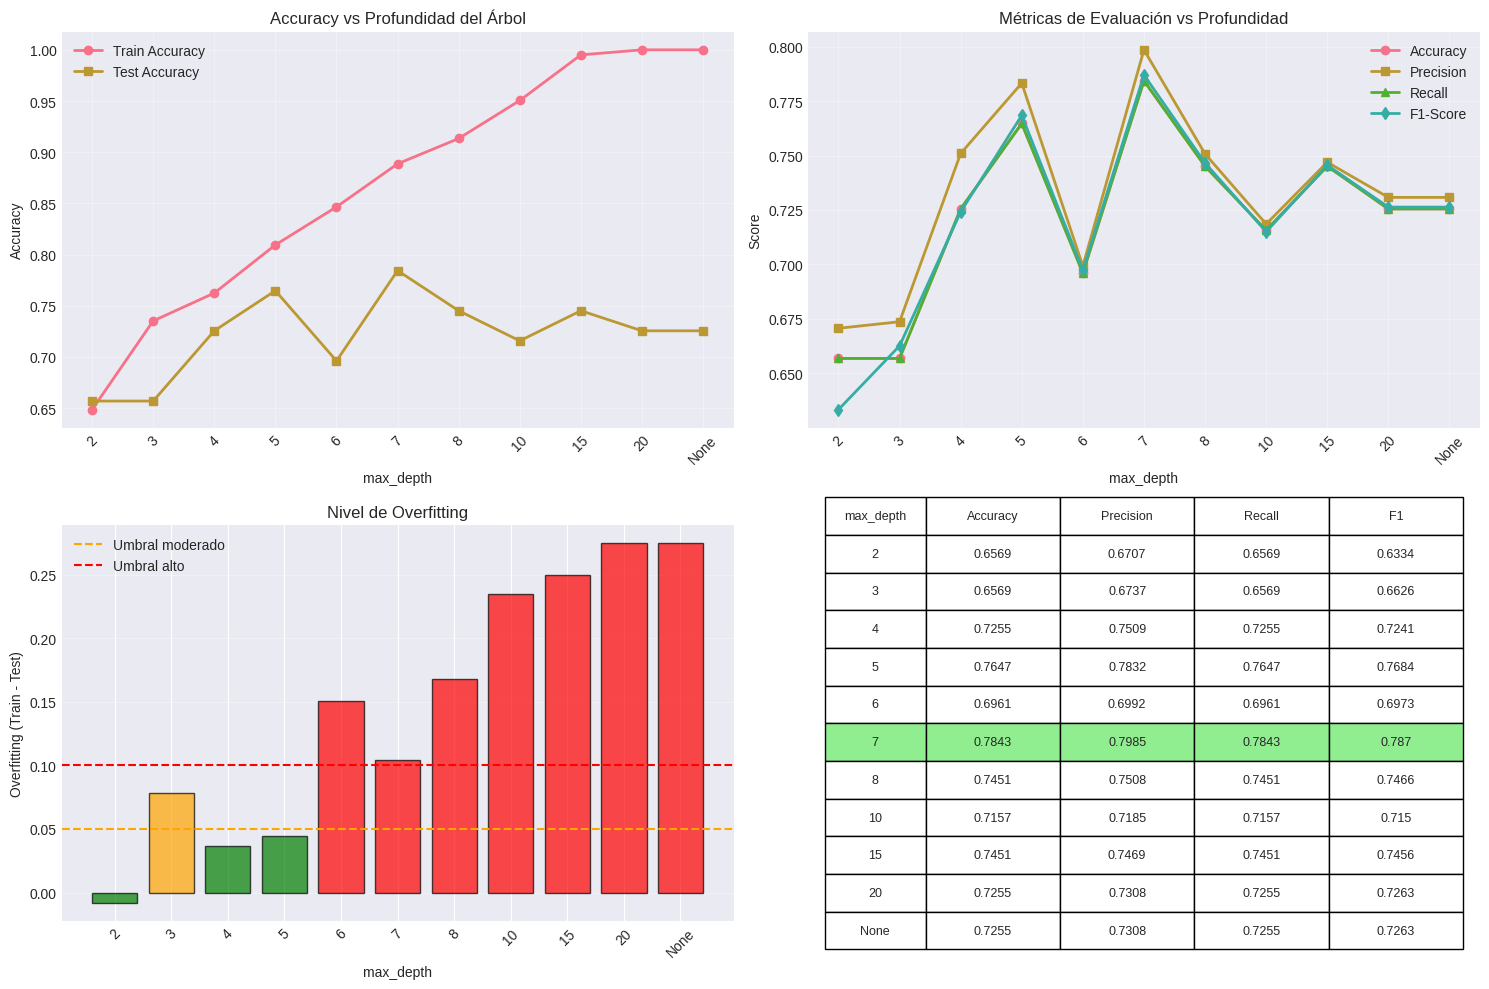

In [7]:
# ============================================================================
# OPTIMIZACIÓN: EXPERIMENTAR CON max_depth
# ============================================================================
print("\n6. OPTIMIZACIÓN CON DIFERENTES PROFUNDIDADES")
print("-" * 70)

# Probar diferentes profundidades
max_depths = [2, 3, 4, 5, 6, 7, 8, 10, 15, 20, None]
results = []

print("\nEntrenando modelos con diferentes profundidades...")
for depth in max_depths:
    # Entrenar modelo
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    # Predicciones
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)

    # Métricas
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    results.append({
        'max_depth': depth if depth else 'None',
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1_score': test_f1,
        'overfitting': train_accuracy - test_accuracy
    })

    depth_str = f"{depth}" if depth else "None"
    print(f"  max_depth={depth_str:>4s} -> "
          f"Train: {train_accuracy:.4f}, Test: {test_accuracy:.4f}, "
          f"F1: {test_f1:.4f}, Overfitting: {train_accuracy - test_accuracy:.4f}")

# Crear DataFrame con resultados
results_df = pd.DataFrame(results)
print("\n✓ Optimización completada")

# Encontrar mejor modelo
best_idx = results_df['test_accuracy'].idxmax()
best_result = results_df.loc[best_idx]
print(f"\n🏆 MEJOR MODELO:")
print(f"  - max_depth: {best_result['max_depth']}")
print(f"  - Accuracy (Test): {best_result['test_accuracy']:.4f} ({best_result['test_accuracy']*100:.2f}%)")
print(f"  - Precision: {best_result['precision']:.4f}")
print(f"  - Recall: {best_result['recall']:.4f}")
print(f"  - F1-Score: {best_result['f1_score']:.4f}")
print(f"  - Overfitting: {best_result['overfitting']:.4f}")

# Visualizar resultados de optimización
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Accuracy vs max_depth
ax1 = axes[0, 0]
x_pos = range(len(results_df))
ax1.plot(x_pos, results_df['train_accuracy'], marker='o', label='Train Accuracy', linewidth=2)
ax1.plot(x_pos, results_df['test_accuracy'], marker='s', label='Test Accuracy', linewidth=2)
ax1.set_xlabel('max_depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs Profundidad del Árbol')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['max_depth'], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Todas las métricas
ax2 = axes[0, 1]
ax2.plot(x_pos, results_df['test_accuracy'], marker='o', label='Accuracy', linewidth=2)
ax2.plot(x_pos, results_df['precision'], marker='s', label='Precision', linewidth=2)
ax2.plot(x_pos, results_df['recall'], marker='^', label='Recall', linewidth=2)
ax2.plot(x_pos, results_df['f1_score'], marker='d', label='F1-Score', linewidth=2)
ax2.set_xlabel('max_depth')
ax2.set_ylabel('Score')
ax2.set_title('Métricas de Evaluación vs Profundidad')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['max_depth'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gráfico 3: Overfitting
ax3 = axes[1, 0]
colors_over = ['red' if x > 0.1 else 'orange' if x > 0.05 else 'green'
               for x in results_df['overfitting']]
ax3.bar(x_pos, results_df['overfitting'], color=colors_over, alpha=0.7, edgecolor='black')
ax3.set_xlabel('max_depth')
ax3.set_ylabel('Overfitting (Train - Test)')
ax3.set_title('Nivel de Overfitting')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_df['max_depth'], rotation=45)
ax3.axhline(y=0.05, color='orange', linestyle='--', label='Umbral moderado')
ax3.axhline(y=0.1, color='red', linestyle='--', label='Umbral alto')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Gráfico 4: Tabla de resultados
ax4 = axes[1, 1]
ax4.axis('tight')
ax4.axis('off')
table_data = results_df[['max_depth', 'test_accuracy', 'precision', 'recall', 'f1_score']].round(4)
table = ax4.table(cellText=table_data.values,
                  colLabels=['max_depth', 'Accuracy', 'Precision', 'Recall', 'F1'],
                  cellLoc='center', loc='center',
                  colWidths=[0.15, 0.2, 0.2, 0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Resaltar mejor resultado
for i in range(len(table_data.columns)):
    table[(best_idx + 1, i)].set_facecolor('#90EE90')

plt.tight_layout()


#Evaluacion

 EVALUACIÓN DETALLADA DEL MEJOR MODELO
----------------------------------------------------------------------

REPORTE DE CLASIFICACIÓN:
                            precision    recall  f1-score   support

            Bajo (<$17.0k)     0.8400    0.8077    0.8235        26
Medio-Bajo ($17.0k-$21.2k)     0.6364    0.8077    0.7119        26
Medio-Alto ($21.2k-$25.0k)     0.8095    0.6800    0.7391        25
            Alto (>$25.0k)     0.9130    0.8400    0.8750        25

                  accuracy                         0.7843       102
                 macro avg     0.7997    0.7838    0.7874       102
              weighted avg     0.7985    0.7843    0.7870       102


MATRIZ DE CONFUSIÓN:
[[21  4  1  0]
 [ 4 21  0  1]
 [ 0  7 17  1]
 [ 0  1  3 21]]

IMPORTANCIA DE CARACTERÍSTICAS:
feature  importance
  LSTAT    0.336637
     RM    0.276385
   CRIM    0.107645
    AGE    0.095809
PTRATIO    0.047656
      B    0.035097
    TAX    0.027200
    DIS    0.025433
  INDUS    0.017446


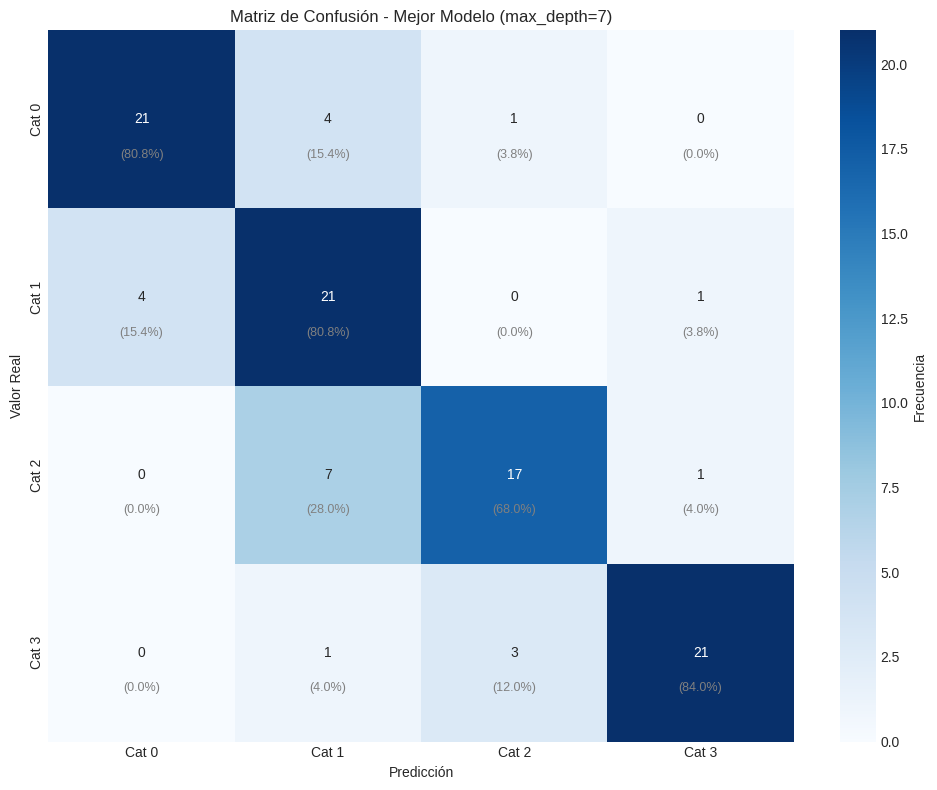

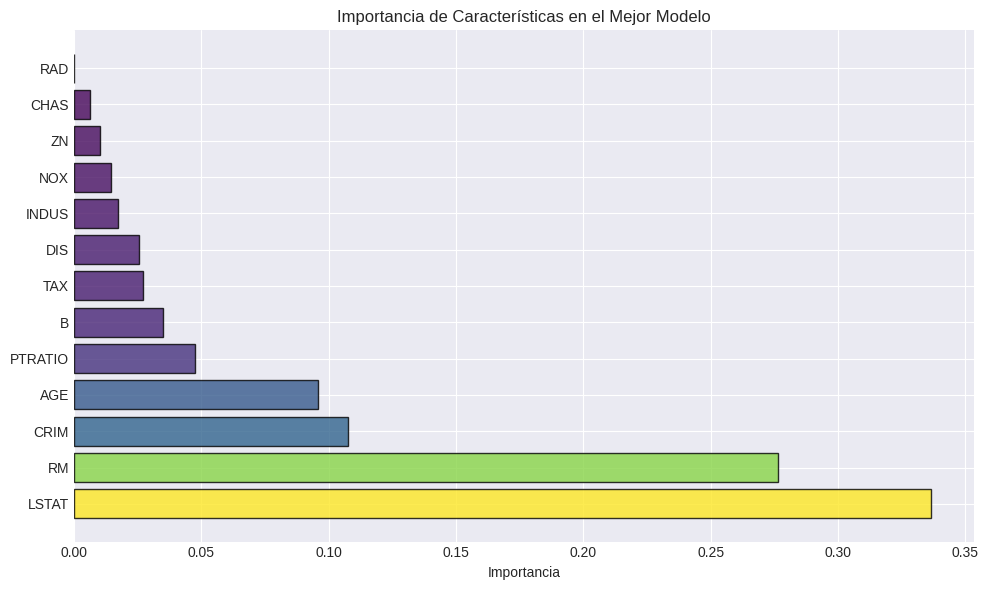

In [13]:
# ============================================================================
# EVALUACIÓN DETALLADA DEL MEJOR MODELO
# ============================================================================
print(" EVALUACIÓN DETALLADA DEL MEJOR MODELO")
print("-" * 70)

# Entrenar el mejor modelo
best_depth = best_result['max_depth']
if best_depth == 'None':
    best_depth = None
else:
    best_depth = int(best_depth)

dt_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_best.fit(X_train, y_train)
y_pred_best = dt_best.predict(X_test)

# Reporte de clasificación
print("\nREPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred_best,
                          target_names=[category_labels[i] for i in range(4)],
                          digits=4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)
print("\nMATRIZ DE CONFUSIÓN:")
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cat {i}' for i in range(4)],
            yticklabels=[f'Cat {i}' for i in range(4)],
            cbar_kws={'label': 'Frecuencia'})
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title(f'Matriz de Confusión - Mejor Modelo (max_depth={best_depth})')

# Agregar porcentajes
for i in range(4):
    for j in range(4):
        total = cm[i].sum()
        percentage = (cm[i, j] / total) * 100 if total > 0 else 0
        plt.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                ha='center', va='center', fontsize=9, color='gray')

plt.tight_layout()


# Importancia de características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_best.feature_importances_
}).sort_values('importance', ascending=False)

print("\nIMPORTANCIA DE CARACTERÍSTICAS:")
print(feature_importance.to_string(index=False))

# Visualizar importancia
plt.figure(figsize=(10, 6))
colors_imp = plt.cm.viridis(feature_importance['importance'] / feature_importance['importance'].max())
plt.barh(feature_importance['feature'], feature_importance['importance'],
         color=colors_imp, alpha=0.8, edgecolor='black')
plt.xlabel('Importancia')
plt.title('Importancia de Características en el Mejor Modelo')
plt.tight_layout()


# Visualizar el árbol de decisión (si no es muy profundo)
if best_depth and best_depth <= 5:
    plt.figure(figsize=(25, 15))
    tree.plot_tree(dt_best,
                   feature_names=X.columns,
                   class_names=[f'Cat {i}' for i in range(4)],
                   filled=True,
                   rounded=True,
                   fontsize=10)
    plt.title(f'Visualización del Árbol de Decisión (max_depth={best_depth})',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()

else:
    print(f"\n⚠ Árbol demasiado profundo para visualizar (depth={dt_best.get_depth()})")

# ============================================================================
# RESUMEN FINAL
# ============================================================================
print("\n" + "="*70)
print("RESUMEN FINAL DEL EJERCICIO")
print("="*70)

print("\n📊 ESTADÍSTICAS DEL DATASET:")
print(f"  - Total de registros: {len(df)}")
print(f"  - Características: {X.shape[1]}")
print(f"  - Categorías de precio: 4 (Bajo, Medio-Bajo, Medio-Alto, Alto)")

print("\n🎯 MEJOR MODELO:")
print(f"  - Configuración: max_depth={best_depth}")
print(f"  - Accuracy: {best_result['test_accuracy']:.4f} ({best_result['test_accuracy']*100:.2f}%)")
print(f"  - Precision: {best_result['precision']:.4f}")
print(f"  - Recall: {best_result['recall']:.4f}")
print(f"  - F1-Score: {best_result['f1_score']:.4f}")
print(f"  - Profundidad real del árbol: {dt_best.get_depth()}")
print(f"  - Número de hojas: {dt_best.get_n_leaves()}")

print("\n🔑 TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"  {idx+1}. {row['feature']}: {row['importance']:.4f}")